In [1]:
# %%
import re
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# %%

IMAGENET = "ImageNet Top 1 Acc." # + " (%)"
MSCOCO = "MS COCO Recall@1" # + " (%)"
NOTES = "notes"
METRIC = "Metric"
SCORE = "%"
MODEL = "Model"
DPI = 300
def enter_result(
        image_net_acc: float,
        mscoco_recall: float,
        notes: str
):
    return {
        IMAGENET: image_net_acc * 100,
        MSCOCO: mscoco_recall * 100,
        NOTES: notes
    }

In [3]:
# %%

results = [
    enter_result(
        0.0795, 0.0261, "Baseline, no teacher"
    ),
    enter_result(
        0.1108, 0.0347, "0.5 Cross Entropy"
    ),
    enter_result(
        0.1162, 0.0376, "0.5 KL, lock logit scale 0.01"
    ),
    enter_result(
        0.1143, 0.0411, "0.5 Interactive, lock logit scale 0.01"
    ),
    enter_result(
        0.3141, 0.1447, "0.5 Feature"
    ),
    enter_result(
        0.3206, 0.1564, "0.5 Feature, lock logit scale 0.01"
    ),
    enter_result(
        0.3624, 0.183, "0.5 Feature, lock logit scale 0.01, 2xLR"
    ),
    enter_result(
        0.367, 0.1883, "0.5 Feature, lock logit scale 0.01, 3xLR"
    ),
    enter_result(
        0.3906, 0.2138, "0.5 Feature, lock logit scale 0.01, 4xLR, 3xWD"
    ),
    enter_result(
        0.3982, 0.2126, "0.5 Feature, lock logit scale 0.01, 3xLR, 2xWD"
    ),
    enter_result(
        0.3992, 0.2186, "0.5 Feature, lock logit scale 0.01, 3xLR, 3xWD, stop@epoch29"
    ),
    enter_result(
        0.5685, 0.3742, "0.5 Feature, init from teacher model"
    ),
    enter_result(
        0.6333, 0.4028, "Teacher"
    )
]

In [4]:
# %%

results_df0 = pd.DataFrame(results)
results_df = results_df0.melt(value_vars=[IMAGENET, MSCOCO], id_vars=[NOTES], var_name=METRIC, value_name=SCORE)
results_df0

,ImageNet Top 1 Acc.,MS COCO Recall@1,notes
0,7.95,2.61,"Baseline, no teacher"
1,11.08,3.47,0.5 Cross Entropy
2,11.62,3.76,"0.5 KL, lock logit scale 0.01"
3,11.43,4.11,"0.5 Interactive, lock logit scale 0.01"
4,31.41,14.47,0.5 Feature
5,32.06,15.64,"0.5 Feature, lock logit scale 0.01"
6,36.24,18.30,"0.5 Feature, lock logit scale 0.01, 2xLR"
7,36.70,18.83,"0.5 Feature, lock logit scale 0.01, 3xLR"
8,39.06,21.38,"0.5 Feature, lock logit scale 0.01, 4xLR, 3xWD"
9,39.82,21.26,"0.5 Feature, lock logit scale 0.01, 3xLR, 2xWD"


In [5]:
print(results_df0.to_latex(index=False))

\begin{tabular}{rrl}
\toprule
ImageNet Top 1 Acc. & MS COCO Recall@1 & notes \\
\midrule
7.950000 & 2.610000 & Baseline, no teacher \\
11.080000 & 3.470000 & 0.5 Cross Entropy \\
11.620000 & 3.760000 & 0.5 KL, lock logit scale 0.01 \\
11.430000 & 4.110000 & 0.5 Interactive, lock logit scale 0.01 \\
31.410000 & 14.470000 & 0.5 Feature \\
32.060000 & 15.640000 & 0.5 Feature, lock logit scale 0.01 \\
36.240000 & 18.300000 & 0.5 Feature, lock logit scale 0.01, 2xLR \\
36.700000 & 18.830000 & 0.5 Feature, lock logit scale 0.01, 3xLR \\
39.060000 & 21.380000 & 0.5 Feature, lock logit scale 0.01, 4xLR, 3xWD \\
39.820000 & 21.260000 & 0.5 Feature, lock logit scale 0.01, 3xLR, 2xWD \\
39.920000 & 21.860000 & 0.5 Feature, lock logit scale 0.01, 3xLR, 3xWD, stop@epoch29 \\
56.850000 & 37.420000 & 0.5 Feature, init from teacher model \\
63.330000 & 40.280000 & Teacher \\
\bottomrule
\end{tabular}



In [6]:
results_df_format = results_df0.copy()
results_df_format = results_df_format.iloc[:, [2, 0, 1]]
print(results_df_format.to_latex(index=False, float_format=lambda x: f"${x:.2f}$".replace('%', ''), escape=False, column_format="lcc", label="tab:results"))

\begin{table}
\label{tab:results}
\begin{tabular}{lcc}
\toprule
notes & ImageNet Top 1 Acc. & MS COCO Recall@1 \\
\midrule
Baseline, no teacher & $7.95$ & $2.61$ \\
0.5 Cross Entropy & $11.08$ & $3.47$ \\
0.5 KL, lock logit scale 0.01 & $11.62$ & $3.76$ \\
0.5 Interactive, lock logit scale 0.01 & $11.43$ & $4.11$ \\
0.5 Feature & $31.41$ & $14.47$ \\
0.5 Feature, lock logit scale 0.01 & $32.06$ & $15.64$ \\
0.5 Feature, lock logit scale 0.01, 2xLR & $36.24$ & $18.30$ \\
0.5 Feature, lock logit scale 0.01, 3xLR & $36.70$ & $18.83$ \\
0.5 Feature, lock logit scale 0.01, 4xLR, 3xWD & $39.06$ & $21.38$ \\
0.5 Feature, lock logit scale 0.01, 3xLR, 2xWD & $39.82$ & $21.26$ \\
0.5 Feature, lock logit scale 0.01, 3xLR, 3xWD, stop@epoch29 & $39.92$ & $21.86$ \\
0.5 Feature, init from teacher model & $56.85$ & $37.42$ \\
Teacher & $63.33$ & $40.28$ \\
\bottomrule
\end{tabular}
\end{table}



In [7]:
# %%

def plot(df: pd.DataFrame, notes: List[str], row_names: List[str], title: str):
    # https://stackoverflow.com/questions/70737222/multiple-multiple-bar-graphs-using-matplotlib
    mask = df[NOTES].isin(notes)
    filtered_df = results_df[mask].reset_index()

    row_names = pd.DataFrame(row_names)
    row_names.index = notes
    row_names = [row_names.loc[filtered_df[NOTES][i]].item() for i in range(len(filtered_df))]
    filtered_df[MODEL] = row_names


    g = sns.catplot(
        x=MODEL, 
        hue=METRIC, 
        y=SCORE, 
        data=filtered_df, 
        kind="bar", 
        height=4, 
        aspect=1.2, 
        palette='Set1'
    )
    # OFFSET = 0.02
    # min_ = max(filtered_df[SCORE].min() - OFFSET, 0)
    # max_ = filtered_df[SCORE].max() + OFFSET
    for ax in g.axes.flat[1:]:
        sns.despine(ax=ax, left=True)
    for ax in g.axes.flat:
        # ax.set_ylim([min_, max_])
        ax.set_xlabel(ax.get_title())
        ax.set_title('')
        ax.margins(x=0.1) # slightly more margin as a separation
    # plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)
    g.figure.suptitle(title, y=1.05)
    # plt.tight_layout()
    save_name = re.sub('[^A-Za-z0-9]+', '', title)
    g.figure.savefig(f"plots/{save_name}.png", dpi=DPI, bbox_inches="tight")
    # plt.show()

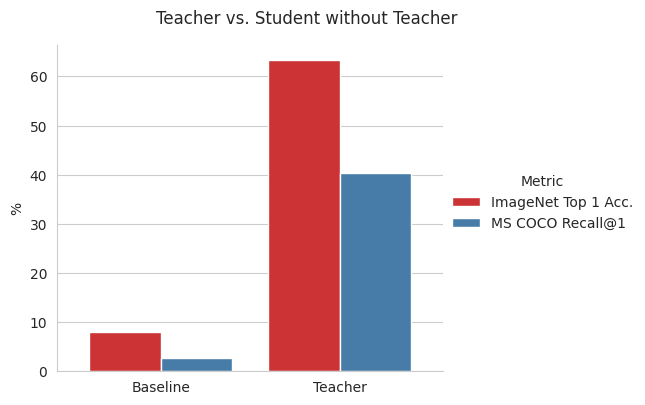

In [8]:
# %%

# we first compared baseline trained without teacher to teacher to verify that the teacher would be helpful
plot(
    results_df,
    ["Baseline, no teacher", "Teacher"], 
    ["Baseline", "Teacher"],
    "Teacher vs. Student without Teacher"
)

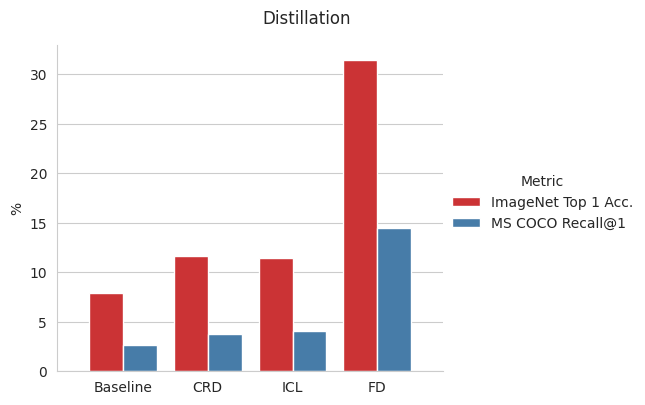

In [9]:
# %%

# we next tried out several types of distillation
plot(
    results_df, 
    ["Baseline, no teacher", 
     "0.5 Feature", 
     "0.5 Interactive, lock logit scale 0.01", 
     "0.5 KL, lock logit scale 0.01"], 
    ["Baseline", "FD", "ICL", "CRD"],
    "Distillation"
)

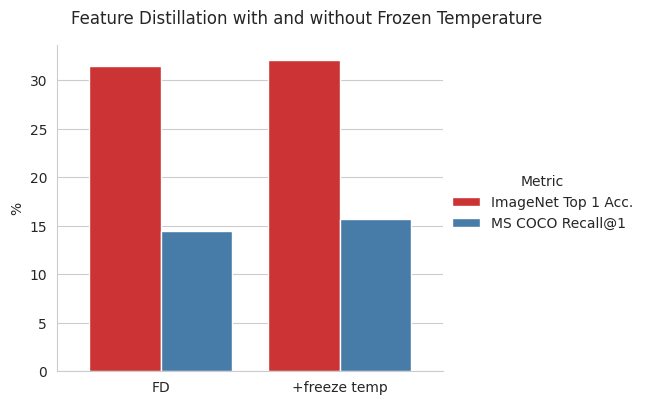

In [10]:
# %%

# locking the logit scale to the same as the teacher model helped
plot(
    results_df, 
    ["0.5 Feature", "0.5 Feature, lock logit scale 0.01"], 
    ["FD", "+freeze temp"],
    "Feature Distillation with and without Frozen Temperature"
)

In [11]:
# %%

# # We also tried interactive and KL
# plot(
#     results_df, 
#     ["0.5 Feature, lock logit scale 0.01", 
#      "0.5 Interactive, lock logit scale 0.01", 
#      "0.5 KL, lock logit scale 0.01"], 
#     ["Feature", "Interactive", "KL"]
# )

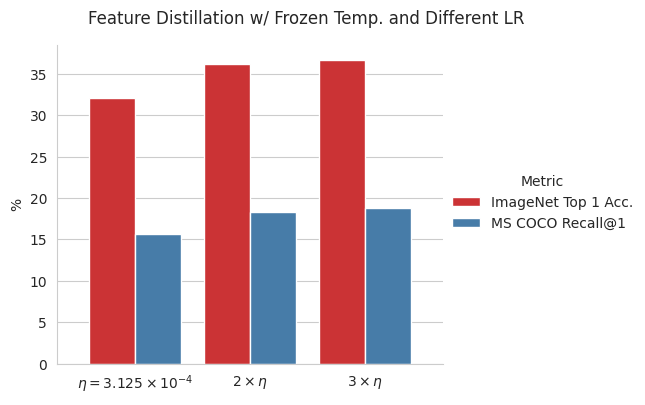

In [12]:
# %%

# increasing LR helped 
plot(
    results_df, 
    ["0.5 Feature, lock logit scale 0.01", 
     "0.5 Feature, lock logit scale 0.01, 2xLR", 
     "0.5 Feature, lock logit scale 0.01, 3xLR"], 
    ["$\\eta=3.125\\times10^{-4}$", "$2\\times\\eta$", "$3\\times\\eta$"],
    "Feature Distillation w/ Frozen Temp. and Different LR"
)

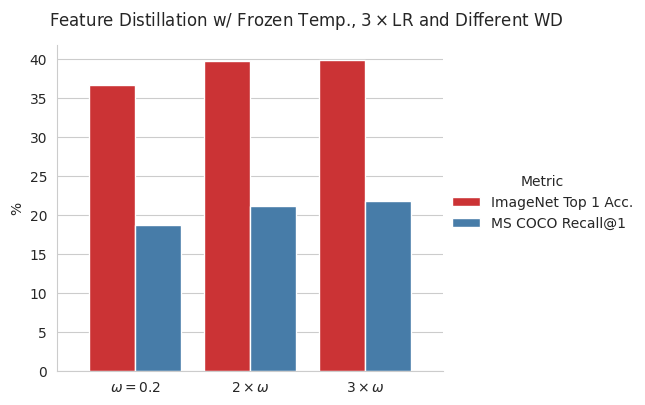

In [13]:
# %%

# increasing weight decay also helped
plot(
    results_df, 
    ["0.5 Feature, lock logit scale 0.01, 3xLR", 
     "0.5 Feature, lock logit scale 0.01, 3xLR, 2xWD", 
     "0.5 Feature, lock logit scale 0.01, 3xLR, 3xWD, stop@epoch29"], 
    ["$\\omega=0.2$", "$2\\times \\omega$", "$3\\times \\omega$"],
    "Feature Distillation w/ Frozen Temp., $3\\times$LR and Different WD"
)

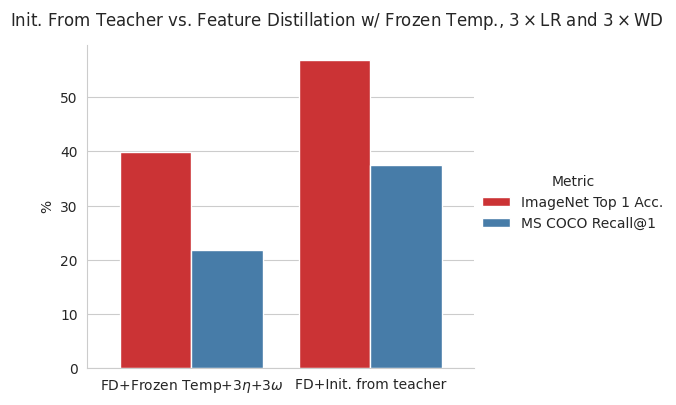

In [14]:
# %%

# our best results came when we init from the teacher model
plot(
    results_df, 
    ["0.5 Feature, lock logit scale 0.01, 3xLR, 3xWD, stop@epoch29", 
     "0.5 Feature, init from teacher model",
    ], 
    ["FD+Frozen Temp+$3\\eta$+$3\\omega$", "FD+Init. from teacher"],
    "Init. From Teacher vs. Feature Distillation w/ Frozen Temp., $3\\times$LR and $3\\times$WD"
)